<a href="https://colab.research.google.com/github/tawounfouet/dataimpact-technical-test/blob/main/Copie_de_DL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science

**Answering questions with a 🔴 are considered mandatory for CDI.**

Before starting the exercises make sure to enable the GPU


*   Go to the runtime menu (&#8593; )
*   Select *Change runtime type*
*   Select GPU as *Hardware accelerator*


## Deep Learning 2

### Exercise 2 -- Gradient Descent and momentum in numpy **(10 points)**

While building a minimal  neural network (a linear model) in numpy, we define the parameters $\theta$ as a matrix $W$ of shape `(8, 1)` and a bias vector $b$ of shape `(1,)`. You are given the functions to compute the loss and the gradient of the loss w.r.t. the parameters.

1. write a function that performs gradient descent over `n_iter` steps with a given `learning rate`
2. write a function that performs momentum gradient descent over `n_iter` steps with a given `learning rate` and `momentum`

*Hint*: formula for the momentum update:

$$ \mathbf{v} \leftarrow \mu \cdot \mathbf{v} + \nabla $$
$$ \mathbf{\theta} \leftarrow \theta - \eta \cdot \mathbf{v} $$

where:

- $\theta$ is the vector of trainable parameters
- $\eta$ is the `learning_rate` coefficient
- $\mu$ is the `momentum` coefficient
- $\nabla$ is the gradient (usually of the loss function for the current value, in this case a random vector)
- $\mathbf{v}$ is the tensor of velocities and as the same shape as the parameters tensor $\theta$. $\mathbf{v}$ is initialized to zero.

In [1]:
import numpy as np

n_samples = 100
n_features = 8

rng = np.random.RandomState(seed=0)
X = rng.randn(n_samples, n_features)
w_true = rng.randn(n_features)
b_true = rng.randn(1)
noise = rng.randn(n_samples) / 10
y = X @ w_true + b_true + noise  # the '@' symbol represents matrix multiplication in Python. It is a shorthand notation for the  numpy.matmul() function or the numpy.dot()

In [2]:
X.shape, y.shape

((100, 8), (100,))

In [3]:
w_true, b_true

(array([ 1.41117206,  0.78580383, -0.05746952, -0.39121705,  0.94091761,
         0.40520408,  0.4980524 , -0.02619224]),
 array([-1.68823003]))

In [4]:
import pandas as pd

pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7
0,1.764052,0.400157,0.978738,2.240893,1.867558,-0.977278,0.950088,-0.151357
1,-0.103219,0.410599,0.144044,1.454274,0.761038,0.121675,0.443863,0.333674
2,1.494079,-0.205158,0.313068,-0.854096,-2.552990,0.653619,0.864436,-0.742165
3,2.269755,-1.454366,0.045759,-0.187184,1.532779,1.469359,0.154947,0.378163
4,-0.887786,-1.980796,-0.347912,0.156349,1.230291,1.202380,-0.387327,-0.302303


from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2[2].plot(kind='hist', bins=20, title=2)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[3].plot(kind='hist', bins=20, title=3)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x=1, y=2, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x=2, y=3, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x=3, y=4, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10[2].plot(kind='line', figsize=(8, 4), title=2)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11[3].plot(kind='line', figsize=(8, 4), title=3)
plt.gca().spines[['top', 'right']].set_visible(False)

In [13]:
pd.DataFrame(y).head()

,0
0,2.009806
1,-1.163999
2,-1.047722
3,2.648598
4,-3.144713


dimensions de X: (100, 8)
dimensions de y: (100,)


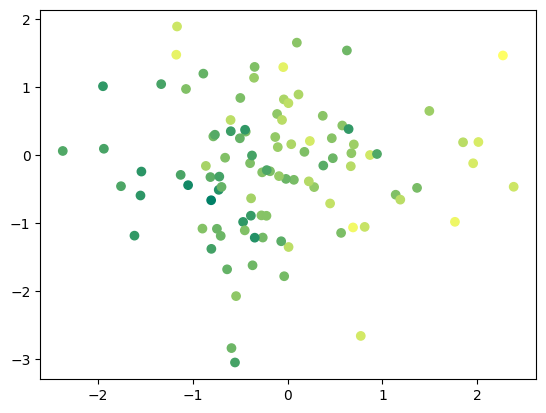

In [9]:
import matplotlib.pyplot as plt

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

#plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(X[:,0], X[:, 5], c=y, cmap='summer')
plt.show()

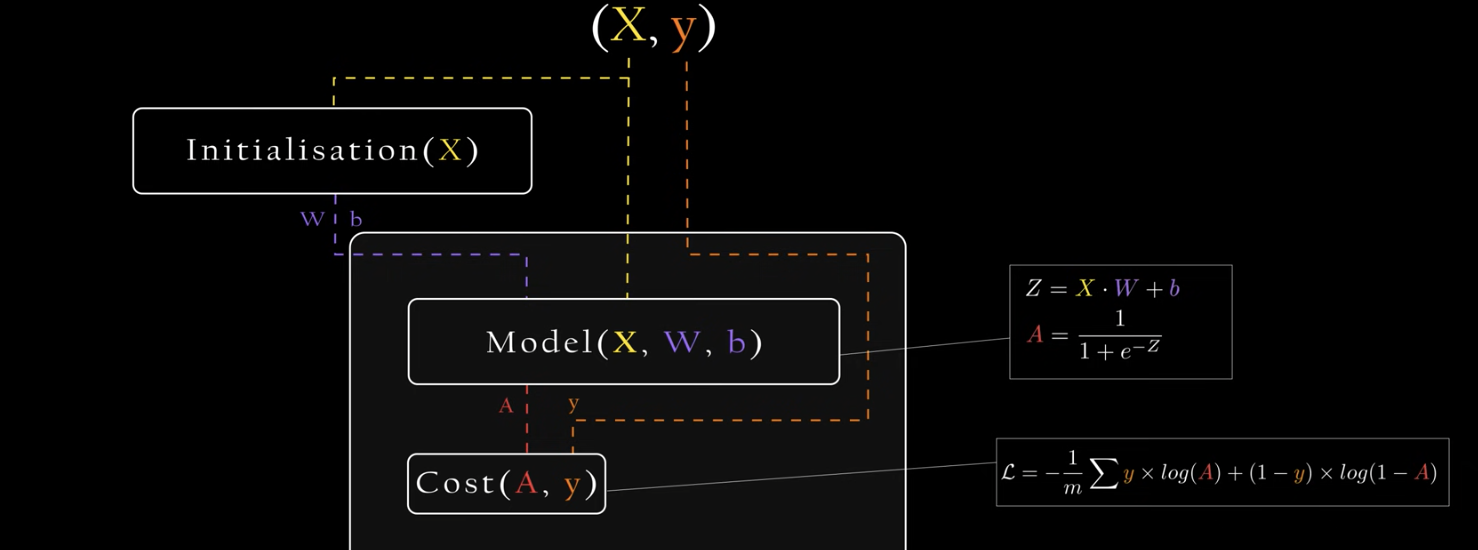

In [15]:
w_true, b_true

(array([ 1.41117206,  0.78580383, -0.05746952, -0.39121705,  0.94091761,
         0.40520408,  0.4980524 , -0.02619224]),
 array([-1.68823003]))

$$
LogLoss = \frac{1}{N} \sum_{i=1}^{N} [y_i \ln(p_i) + (1 - y_i) \ln(1 - p_i)]
$$

In [16]:
def loss(params):
    y_pred = X @ params[0] + params[1]
    return np.mean(0.5 * (y - y_pred) ** 2, axis=0)


def gradients(params):
    y_pred = X @ params[0] + params[1] # y_pred = X * w_true + b_true
    diff = y_pred - y
    return [np.mean(X * diff.reshape(-1, 1), axis=0),
            np.mean(diff, axis=0)]

In [17]:
init_params = [np.zeros(shape=(n_features,)),
               np.zeros(shape=(1,))]

loss(init_params)

4.387651045016995

In [18]:
learning_rate = 0.1
momentum = 0.5

In [20]:
def gradient_descent(init_params, n_iter=5):
    params = [p.copy() for p in init_params]
    for step in range(n_iter):
        new_gradients = gradients(params)
        # write code to update the parameters with the
        # gradients using gradient descent
        params[0] -= learning_rate * new_gradients[0] # w_true = w_true - learning_rate * dW
        params[1] -= learning_rate * new_gradients[1] # b_true = b_true - learning_rate * db
    return params


final_params_gd = gradient_descent(init_params, n_iter=15)
loss(final_params_gd)

0.10512056065005256

In [21]:
def momentum_gradient_descent(init_params, n_iter=5):
    params = [p.copy() for p in init_params]
    velocity = [np.zeros_like(p) for p in init_params]  # Initialize velocity
    for step in range(n_iter):
        new_gradients = gradients(params)
        # write code to update the parameters with the
        # gradients using momentum gradient descent
           # Update velocity using momentum formula
        velocity[0] = momentum * velocity[0] + learning_rate * new_gradients[0]
        velocity[1] = momentum * velocity[1] + learning_rate * new_gradients[1]
           # Update parameters using the updated velocity
        params[0] -= velocity[0]
        params[1] -= velocity[1]
    return params

final_params_mgd = momentum_gradient_descent(init_params, n_iter=15)
loss(final_params_mgd)

0.008094608613871715

In [ ]:
# Compute loss for both methods
loss_gd = loss(final_params_gd)
loss_mgd = loss(final_params_mgd)

print("Loss after Gradient Descent:", round(loss_gd, 4))
print("Loss after Momentum Gradient Descent:", round(loss_mgd, 4))

Loss after Gradient Descent: 0.1051
Loss after Momentum Gradient Descent: 0.0081


### Exercise 3 -- Natural Language Classifier

Alice wants to classify the topic of tweets. She is interested in knowing whether the tweet is dealing with `politics`, `technology`, `religion` or none of the 3. She supposes only one of these possibilities can happen for a given tweet.

Say she has a dataset of 10K tweets with their corresponding label.

##### 🔴 3.3 Write the second and third models in the `elif` statements below **(10 points)**

- model 2: based on LSTM with a sensible number of hidden units
- model 3: based on several Convolutions1D and MaxPoolings with sensible numbers of parameters

In [7]:
from tensorflow.keras.layers import Dense, Input, Flatten, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

MAX_NB_WORDS = 20000
EMBEDDING_DIM = 5
MAX_SEQUENCE_LENGTH = 50
model_num = 1
N_CLASSES = 4

# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)
embedded_sequences = embedding_layer(sequence_input)

if model_num == 1:
    x = GlobalAveragePooling1D()(embedded_sequences)
    predictions = Dense(N_CLASSES, activation='softmax')(x)
elif model_num == 2:
    # WRITE ME
     # pass
    x = LSTM(64)(embedded_sequences)  # LSTM layer with 64 hidden units
    predictions = Dense(N_CLASSES, activation='softmax')(x)

elif model_num == 3:
    # WRITE ME
    #  pass
    x = Conv1D(128, 5, activation='relu')(embedded_sequences)  # 128 filters with kernel size 5
    x = MaxPooling1D(5)(x)  # MaxPooling with pool size 5
    x = Conv1D(128, 5, activation='relu')(x)  # Another Conv1D layer
    x = MaxPooling1D(5)(x)  # Another MaxPooling layer
    x = Flatten()(x)
    predictions = Dense(N_CLASSES, activation='softmax')(x)

model = Model(sequence_input, predictions)
model.compile(loss="categorical_crossentropy",
              optimizer='adam', metrics=['acc'])

In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 50, 5)             100000    
                                                                 
 global_average_pooling1d_1  (None, 5)                 0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
Total params: 100024 (390.72 KB)
Trainable params: 100024 (390.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Use the following random input to check that you code can run without failing with randomly initialized weights.

In [9]:
import numpy as np

batch_size = 3
random_batch = np.random.randint(low=0, high=MAX_NB_WORDS,
                                 size=(batch_size, MAX_SEQUENCE_LENGTH))
model.predict(random_batch)

1/1 [==============================] - 0s 184ms/step


array([[0.25021505, 0.249916  , 0.24954301, 0.25032598],
       [0.2514264 , 0.24996103, 0.24926937, 0.24934326],
       [0.24934989, 0.2496881 , 0.25035763, 0.25060442]], dtype=float32)

In [30]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 50, 5)             100000    
                                                                 
 conv1d (Conv1D)             (None, 46, 128)           3328      
                                                                 
 max_pooling1d (MaxPooling1  (None, 9, 128)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 128)            82048     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 128)            0         
 g1D)                                                      

Exercise 4 -- Captioning

##### 4.1 Consider the following image-captioning model, which takes as input an image, and produces as output a sentence describing the image.

<img src="https://i.imgur.com/QRS2Hrj.png" style="width: 600px;" />

Notes:
- All the images in the training set are 224x224 RGB color images.
- Each sentence in the training set is an English sentence of maximum length 20, with words indexed as integers in a vocabulary of size 1000. There are special symbols; `<s>` for start of sequence and `<eos>` for end of sequence included in the 20 words length.
- Henri does not one-hot encode the text part of the training data: he feeds the model directly with arrays of integer values as representation for the sequences.
- During training, we use teacher forcing, which means we pass as input both the image and the shifted output text, and predict the next word.
- The ResNet is pre-trained on ImageNet and outputs a vector representation of each image in dimension 2048, then a linear projection projects to a dimension of 128
- For simplicity, we add the $h$ (`img_features` in the code below) image representation to the decoder's hidden activation $h_i^{dec}$ at each time step instead of just the first one, using `RepeatVector`

In [32]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Input, Flatten, SimpleRNN, RepeatVector, Lambda
from tensorflow.keras.layers import GlobalAveragePooling2D, Embedding, Dot, Reshape, Softmax
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

base_model = ResNet50(include_top=True)

102967424/102967424 [==============================] - 1s 0us/step


In [33]:
input_img = base_model.layers[0].input
input_text = Input(shape=(20,), dtype='int32')

MAX_NB_WORDS = 1000
EMBEDDING_DIM = 128
SEQ_LENGTH = 20

# Image features: from the pre-trained resnet
img_features = base_model.layers[-2].output
img_features = Dense(EMBEDDING_DIM, use_bias=False)(img_features)
img_features = RepeatVector(SEQ_LENGTH)(img_features)

# Input text embedding
input_text = Input(shape=(SEQ_LENGTH,), dtype='int32')
embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM,
                            input_length=SEQ_LENGTH)
embedded_text = embedding_layer(input_text)

# Combining the two and producing the output
rnn_input = embedded_text + img_features
output_seq = SimpleRNN(EMBEDDING_DIM)(rnn_input)
output_seq = Dense(MAX_NB_WORDS, activation="softmax")(output_seq)

model = Model([input_img, input_text], output_seq)

In [35]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        